In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model
import numpy as np

In [2]:
# Ea can be calculated by the modified Arrhenius equation and the values of kb obtained at 3 or 4 different temperatures
# the concentration of the adsorbed molecule e.g., CO2 is invariant at 200ppm
df_kin = pd.DataFrame({'Value':[0.00478, 0.00583, 0.00728, 0.01956],
                      'Temperature':[298.15, 308.15, 323.15, 373.15]})

# find the average temperature
Taver = df_kin.Temperature.mean()

# define x and y column
xData = df_kin.loc[:, 'Temperature']
yData = df_kin.loc[:, 'Value']

[[Model]]
    Model(mod_Arrhenius)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 4
    # variables        = 2
    chi-square         = 4.7649e-07
    reduced chi-square = 2.3824e-07
    Akaike info crit   = -59.7724624
    Bayesian info crit = -60.9998737
[[Variables]]
    Ea:  18300.5431 +/- 845.947368 (4.62%) (init = 10000)
    A:   0.00824232 +/- 2.9429e-04 (3.57%) (init = 10000)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ea, A) = -0.787


The activation energy was calculated to be 18301 J/mol


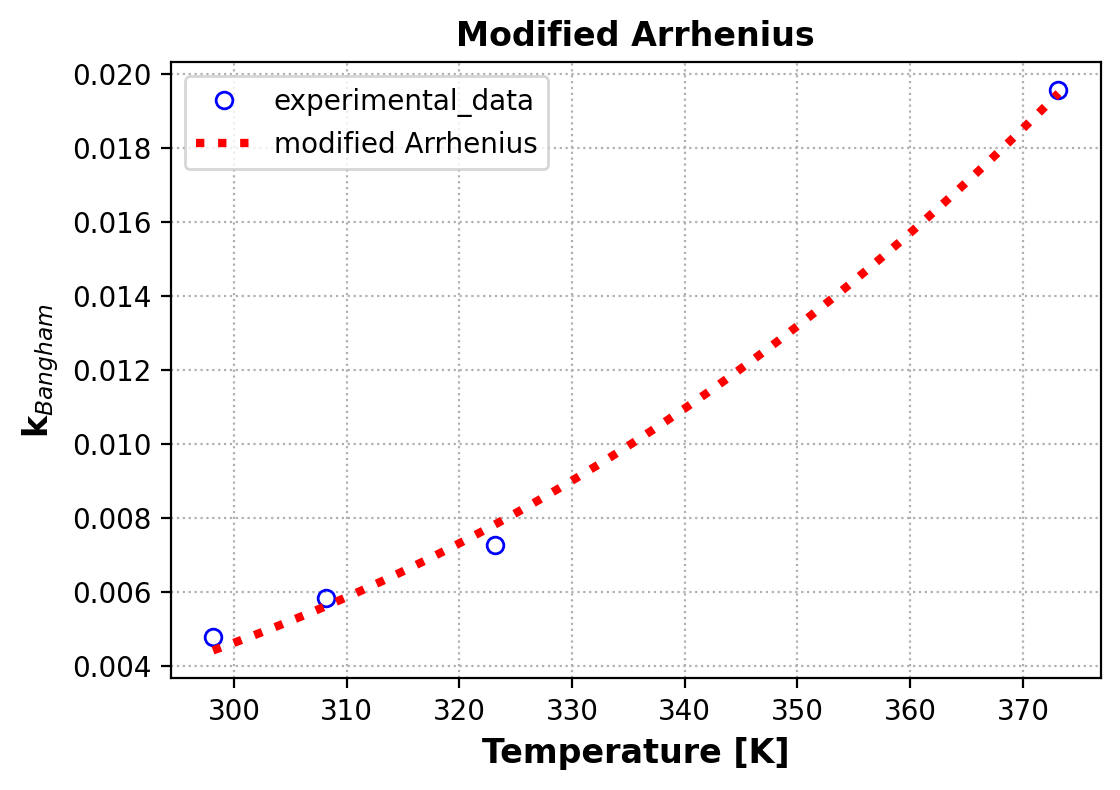

In [3]:
#Fitting function PFO
def mod_Arrhenius(x, Ea, A):
    return A*np.exp(-Ea*(1/x - 1/Taver)*(1/8.314))

my_model = Model(mod_Arrhenius)
my_model.set_param_hint('Ea', min=0, max=50000)
my_model.set_param_hint('A', min=0, max=1e5)

result = my_model.fit(yData, x=xData, Ea=10000, A=10000)

x_eval = np.linspace(min(xData), max(xData), 200)

best_values = result.best_values
best_fit = result.best_fit
best_mod_Arrhenius = np.array(mod_Arrhenius(x_eval, best_values['Ea'], best_values['A']))

print(result.fit_report())

# define the size of the figure
fig = plt.figure(figsize=(6,4), dpi=200)

# plot experimental data
plt.plot(xData, yData, "bo", mfc = "none", label="experimental_data")

#Plot the fitted function - %.2f means that I want to present 2 digits
plt.plot(x_eval, best_mod_Arrhenius, "r:", label="modified Arrhenius", lw = 3)

#plot properties
plt.legend(frameon=True)
plt.grid(linestyle='dotted')
plt.legend(facecolor='white')
plt.xlabel("Temperature [K]", fontsize=12, fontweight='bold')
plt.ylabel("k$_{Bangham}$", fontsize=12, fontweight='bold')
plt.title("Modified Arrhenius", fontsize=12, fontweight='bold')
plt.tight_layout

print('\n')
print('The activation energy was calculated to be %.0f J/mol' %best_values['Ea'])